Compile Status
-------------------------------
Loss= DiceLoss() 

Optimizer= Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
) 

Metrics= ['dice_score', 'loss'] 


Data Status
-------------------------------
Batch Shape of Training Features: (1, 1, 32, 32, 16) torch.float32
Batch Shape of Training Labels: (1, 1, 32, 32, 16) torch.float32

Training
-------------------------------
Epoch 1
-------------------------------
(1, 1, 32, 32, 16) torch.float32


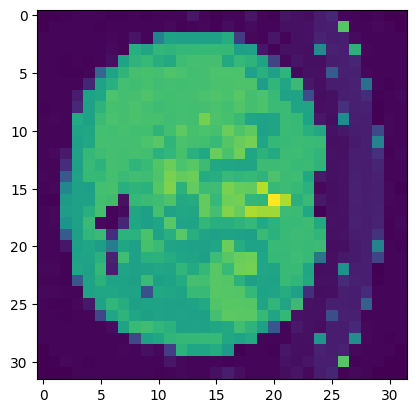

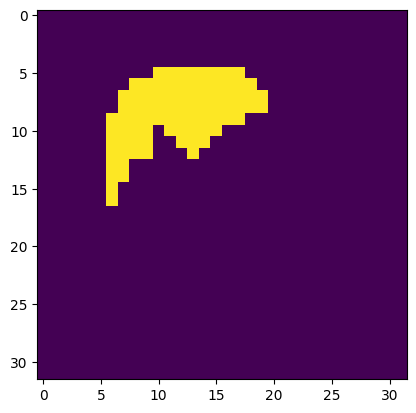

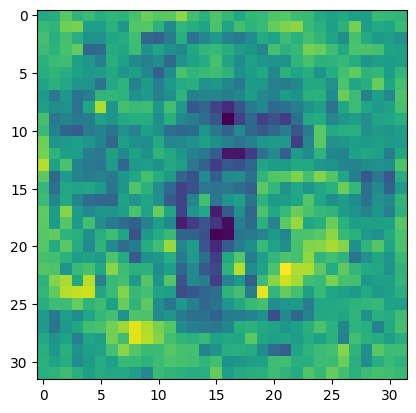

loss: 0.061567        [    1/    4]
Dice Score: 0.938433  [    1/    4]
(1, 1, 32, 32, 16) torch.float32


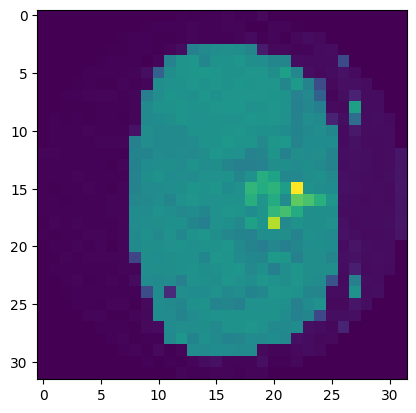

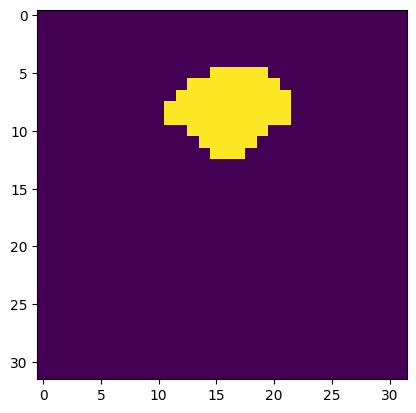

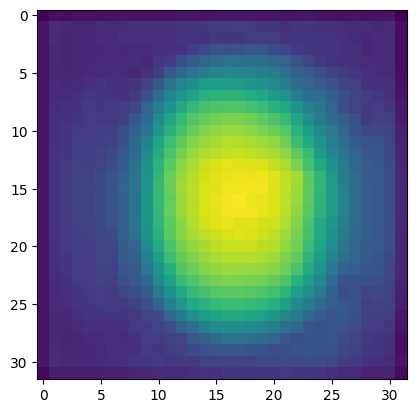

loss: 0.847029        [    2/    4]
Dice Score: 0.152971  [    2/    4]
(1, 1, 32, 32, 16) torch.float32


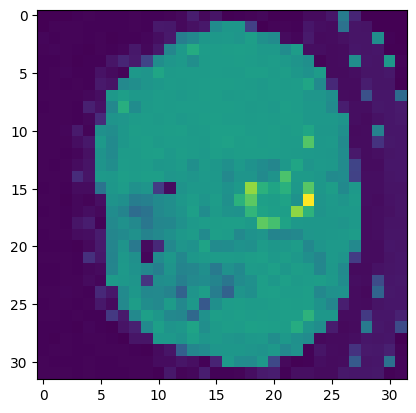

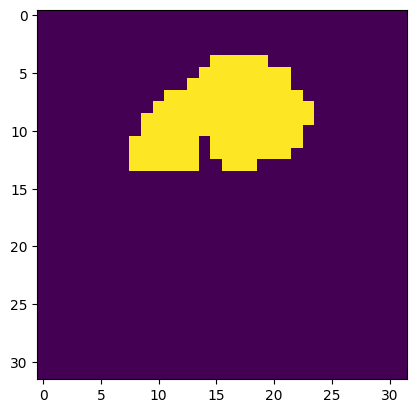

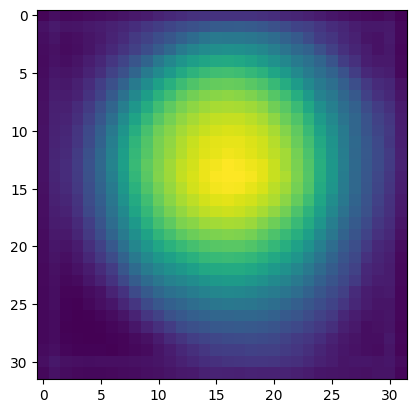

loss: 0.875009        [    3/    4]
Dice Score: 0.124991  [    3/    4]
(1, 1, 32, 32, 16) torch.float32


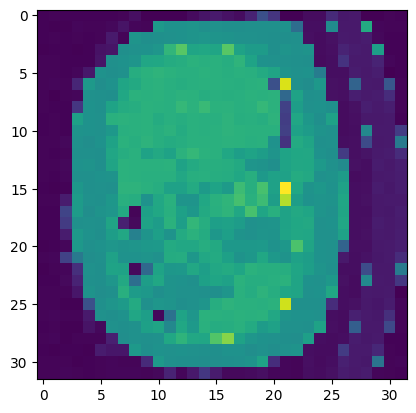

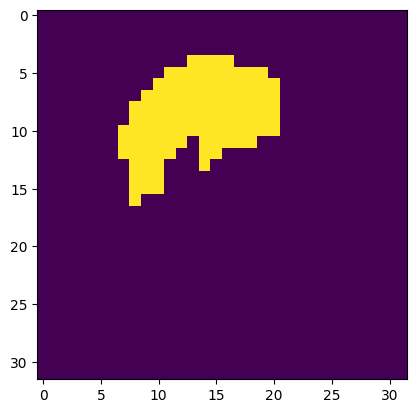

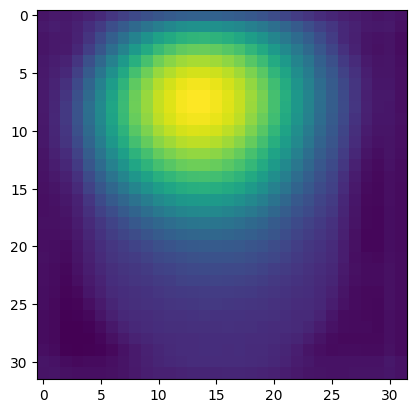

loss: 0.637803        [    4/    4]
Dice Score: 0.362197  [    4/    4]

Testing
-------------------------------
loss: 0.877560
Dice Score: 0.122440

Prediction
-------------------------------


FileNotFoundError: No such file or no access: 'C:\dataset\Path\liver-orig002.nii'

In [1]:
import unet
import losses
import engine
import torch
import json
from torch import nn

class NeuralNetwork(unet.UNet3D,engine.Engine):
    def __init__(self):
        engine.Engine.__init__(self)
        unet.UNet3D.__init__(self,1,1)


with open('../config/configs.json') as f:
    config = json.load(f)

model=NeuralNetwork()
#losses.LossFunctions.choose(config['loss_function']
model.compile(loss= nn.BCEWithLogitsLoss()), optimizer= torch.optim.Adam(model.parameters(),lr=config['optimizer']['learning_rate']), metrics=['dice_score','loss'])
print("Compile Status")
print("-------------------------------")
model.compile_status()


model.load_data(dataset_path=config['dataset']['Barbary'],transformation_flag=True,transformation=config['transformation_size'],batchsize=config['batch_size'],test_valid_split=0)
print("\nData Status")
print("-------------------------------")
model.data_status()

print("\nTraining")
print("-------------------------------")
model.fit(epochs=config['epochs']) #one epoch on one input with transformation [64,256,256] took 7 minutes

print("\nTesting")
print("-------------------------------")
model.evaluate_train() #evaluation on one input with transformation [64,256,256] took 2 minutes

# print("\nPrediction")
# print("-------------------------------")
# ImagePath=config['ImagePath']
# output=model.predict(ImagePath)
# output.shape